In [81]:
import pandas as pd

df = pd.read_csv('ee-chart.csv')
df = df.groupby(['Time']).mean()
df.rename(columns={'NDWI': 'Garhi Edge'}, inplace=True)

print(df) 
df1 = pd.read_csv('ee-chart (1).csv')
df1 = df1.groupby(['Time']).mean()
df1.rename(columns={'NDWI': 'Garhi Center'}, inplace=True)

print(df1) 

df2 = pd.read_csv('ee-chart (2).csv')
df2 = df2.groupby(['Time']).mean()
df2.rename(columns={'NDWI': 'Vidyasagar Center'}, inplace=True)


print(df2) 



              Garhi Edge
Time                    
Apr 17, 2020      0.0945
Apr 17, 2021     -0.1350
Apr 17, 2022     -0.1020
Apr 2, 2020       0.2280
Apr 2, 2021      -0.1710
...                  ...
Nov 8, 2020       0.1770
Nov 8, 2021       0.2370
Oct 19, 2020      0.2205
Oct 24, 2021      0.2710
Oct 29, 2020      0.2010

[64 rows x 1 columns]
              Garhi Center
Time                      
Apr 17, 2020         0.262
Apr 17, 2021         0.103
Apr 17, 2022         0.078
Apr 2, 2020          0.352
Apr 2, 2021          0.323
...                    ...
Nov 8, 2020          0.339
Nov 8, 2021          0.275
Oct 19, 2020         0.286
Oct 24, 2021         0.294
Oct 29, 2020         0.369

[64 rows x 1 columns]
              Vidyasagar Center
Time                           
Apr 17, 2020             -0.195
Apr 17, 2021             -0.160
Apr 17, 2022             -0.132
Apr 2, 2020              -0.215
Apr 2, 2021              -0.212
Apr 27, 2022             -0.140
Apr 7, 2020           

In [82]:
df = pd.concat([df,df1, df2], axis=1)
# df['Time'] = df.index

# pd.to_datetime(df['Time'])
# df = pd.to_datetime(df['Time'])
print(df) 

              Garhi Edge  Garhi Center  Vidyasagar Center
Time                                                     
Apr 17, 2020      0.0945         0.262             -0.195
Apr 17, 2021     -0.1350         0.103             -0.160
Apr 17, 2022     -0.1020         0.078             -0.132
Apr 2, 2020       0.2280         0.352             -0.215
Apr 2, 2021      -0.1710         0.323             -0.212
...                  ...           ...                ...
Nov 8, 2020       0.1770         0.339              0.221
Nov 8, 2021       0.2370         0.275              0.052
Oct 19, 2020      0.2205         0.286              0.062
Oct 24, 2021      0.2710         0.294                NaN
Oct 29, 2020      0.2010         0.369              0.212

[64 rows x 3 columns]


In [83]:
df = df.reset_index()
# df.sort_values(by='Time', inplace=True)



In [84]:
print(df)

            Time  Garhi Edge  Garhi Center  Vidyasagar Center
0   Apr 17, 2020      0.0945         0.262             -0.195
1   Apr 17, 2021     -0.1350         0.103             -0.160
2   Apr 17, 2022     -0.1020         0.078             -0.132
3    Apr 2, 2020      0.2280         0.352             -0.215
4    Apr 2, 2021     -0.1710         0.323             -0.212
..           ...         ...           ...                ...
59   Nov 8, 2020      0.1770         0.339              0.221
60   Nov 8, 2021      0.2370         0.275              0.052
61  Oct 19, 2020      0.2205         0.286              0.062
62  Oct 24, 2021      0.2710         0.294                NaN
63  Oct 29, 2020      0.2010         0.369              0.212

[64 rows x 4 columns]


In [85]:
from datetime import datetime


for col in df.columns:
    print(col)


for index, row in df.iterrows():
    t = row['Time']
    d = datetime.strptime(t, '%b %d, %Y')
    row['Time'] = d.strftime('%d-%m-%Y')
    # print(row['c1'], row['c2'])

Time
Garhi Edge
Garhi Center
Vidyasagar Center


In [86]:
df["Time"] = df["Time"].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%y-%m-%d'))

In [87]:
print(df)

        Time  Garhi Edge  Garhi Center  Vidyasagar Center
0   20-04-17      0.0945         0.262             -0.195
1   21-04-17     -0.1350         0.103             -0.160
2   22-04-17     -0.1020         0.078             -0.132
3   20-04-02      0.2280         0.352             -0.215
4   21-04-02     -0.1710         0.323             -0.212
..       ...         ...           ...                ...
59  20-11-08      0.1770         0.339              0.221
60  21-11-08      0.2370         0.275              0.052
61  20-10-19      0.2205         0.286              0.062
62  21-10-24      0.2710         0.294                NaN
63  20-10-29      0.2010         0.369              0.212

[64 rows x 4 columns]


In [88]:
df.sort_values(by='Time', inplace=True)
print(df)

        Time  Garhi Edge  Garhi Center  Vidyasagar Center
32  20-01-23      0.3715        0.3900              0.226
25  20-02-02      0.3490        0.3840              0.234
21  20-02-12      0.3320        0.4000              0.269
24  20-02-17      0.3050        0.4140              0.154
42  20-03-03      0.1570        0.2985             -0.139
..       ...         ...           ...                ...
2   22-04-17     -0.1020        0.0780             -0.132
6   22-04-27     -0.0880        0.0800             -0.140
48  22-05-02     -0.0590        0.0490                NaN
50  22-05-27     -0.0400        0.1020             -0.143
35  22-06-11     -0.0650        0.0430             -0.144

[64 rows x 4 columns]


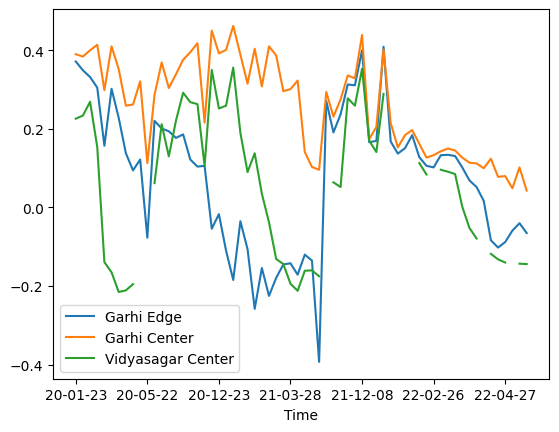

In [89]:
import matplotlib.pyplot as plt
df.plot(x="Time", y=["Garhi Edge", "Garhi Center", "Vidyasagar Center"])
plt.show()